In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community.community_louvain as community_louvain

In [18]:
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

pos = nx.spring_layout(G, seed=42)

Nodes: 4039
Edges: 88234


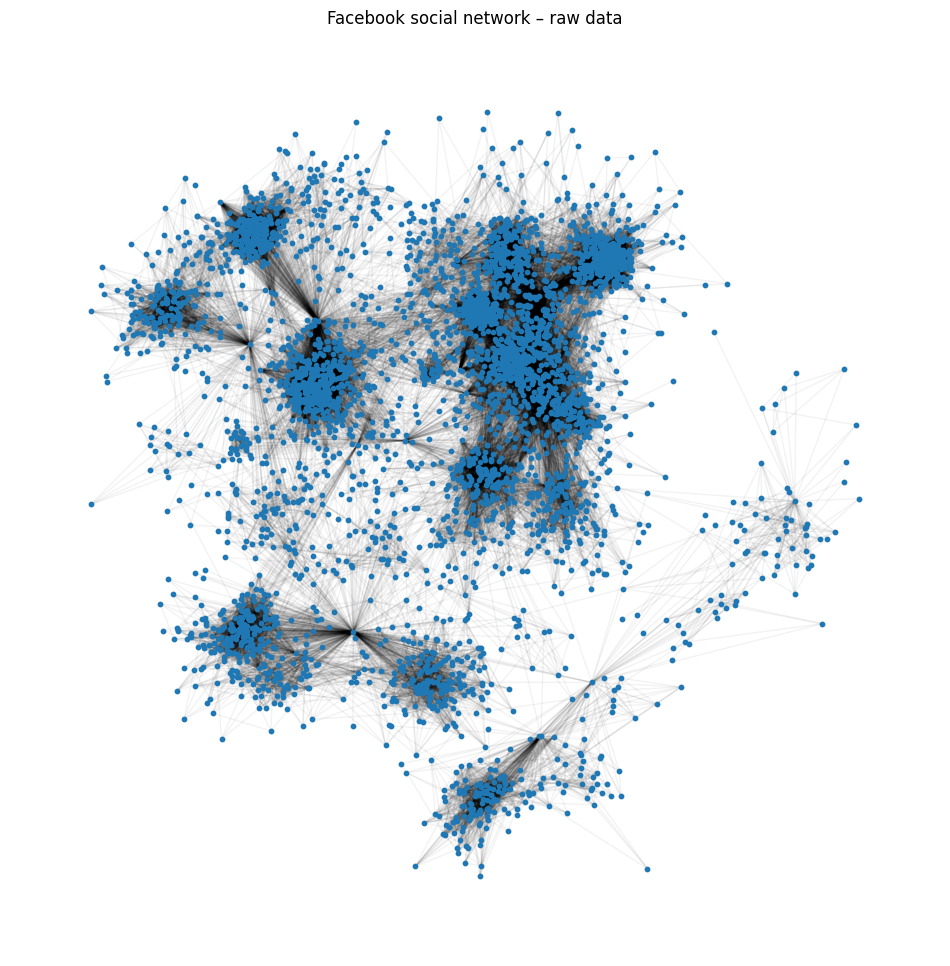

In [19]:
# ==============================
# Visualization raw graph
# ==============================
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.05)
plt.title("Facebook social network – raw data")
plt.axis("off")
plt.show()

In [20]:
partition = community_louvain.best_partition(G) # slovník {node_id: community_id}

/tmp/ipykernel_6773/4165337490.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(communities))


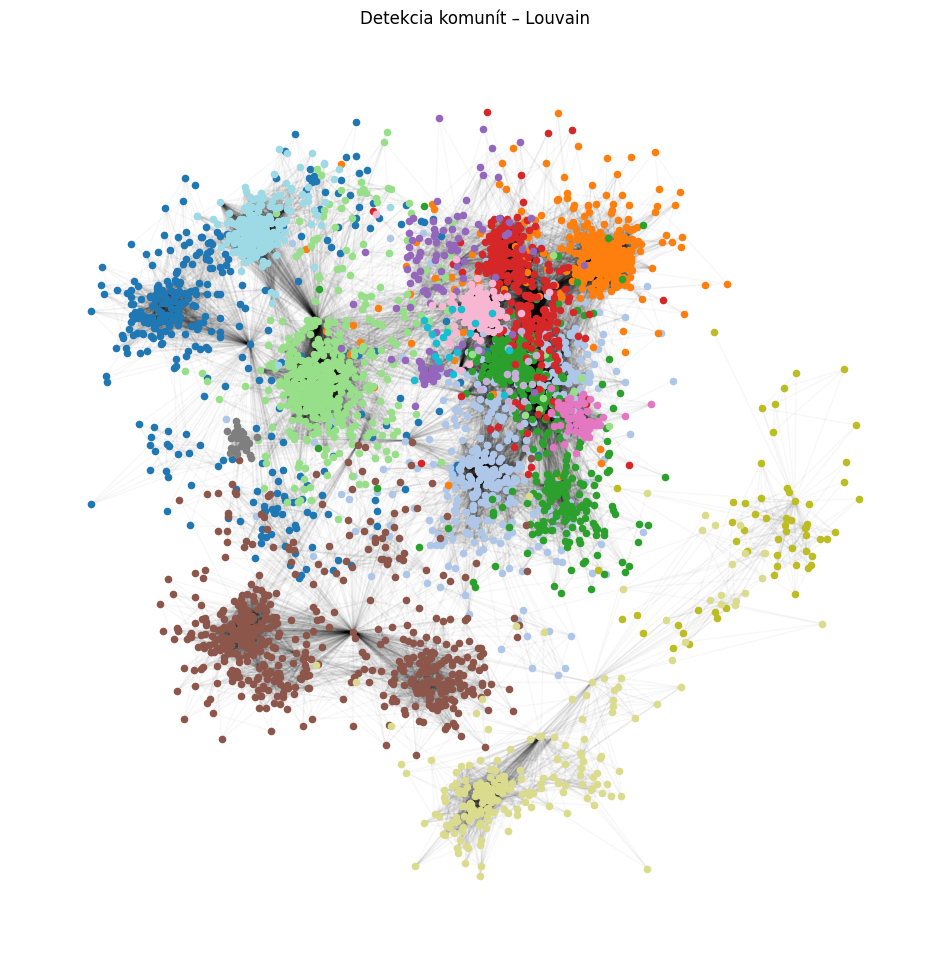

Modularita (Louvain): 0.8349491780185039


In [ ]:
# ==============================
# Louvain
# ==============================
partition = community_louvain.best_partition(G)

plt.figure(figsize=(12, 12))

communities = list(set(partition.values()))
cmap = cm.get_cmap('tab20', len(communities))

for i, comm in enumerate(communities):
    nodes = [n for n in G.nodes() if partition[n] == comm]
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes,
        node_size=20,
        node_color=[cmap(i)]
    )

nx.draw_networkx_edges(G, pos, alpha=0.03)
plt.title("Detekcia komunít – Louvain")
plt.axis("off")
plt.show()

mod = community_louvain.modularity(partition, G)
print("Modularita (Louvain):", mod)


Počet komunít (LPA): 44
Modularita (LPA): 0.7368407345348218


/tmp/ipykernel_6773/3209859894.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_lpa = cm.get_cmap('tab20', len(communities_lpa))


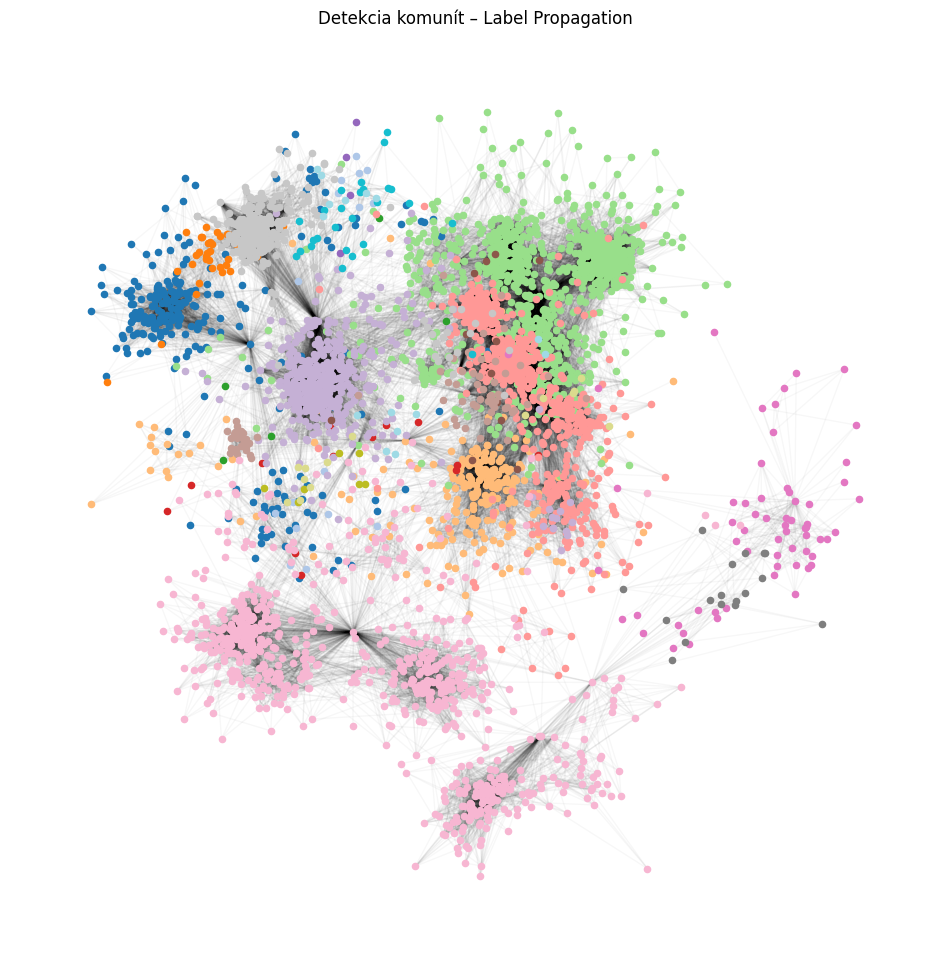

In [22]:
# ==============================
# Label Propagation Algorithm (LPA)
# ==============================
communities_lpa = list(nx.algorithms.community.label_propagation_communities(G))
print("Počet komunít (LPA):", len(communities_lpa))

# Convert communities → partition dict
partition_lpa = {}
for idx, comm in enumerate(communities_lpa):
    for node in comm:
        partition_lpa[node] = idx

# Modularita LPA
mod_lpa = community_louvain.modularity(partition_lpa, G)
print("Modularita (LPA):", mod_lpa)


# ==============================
# Visualization LPA
# ==============================
plt.figure(figsize=(12, 12))

cmap_lpa = cm.get_cmap('tab20', len(communities_lpa))

for idx, comm in enumerate(communities_lpa):
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=list(comm),
        node_size=20,
        node_color=[cmap_lpa(idx)]
    )

nx.draw_networkx_edges(G, pos, alpha=0.03)
plt.title("Detekcia komunít – Label Propagation")
plt.axis("off")
plt.show()